In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
import torch
print(torch.__version__)


2.6.0+cu118


In [3]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_data.data.shape


torch.Size([60000, 28, 28])

In [7]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [8]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [9]:
train_data.targets.size()

torch.Size([60000])

In [10]:
from torch.utils.data import DataLoader

loader = {
    "train": DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
    "test": DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1),
}

In [11]:
loader

{'train': <torch.utils.data.dataloader.DataLoader at 0x1f50f58e460>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1f50f58e430>}

In [12]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x,training=self.training)
        x = self.fc2(x)

        return F.softmax(x)

In [13]:
!nvidia-smi

Mon Mar 31 17:36:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.42                 Driver Version: 572.42         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1050 Ti   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   52C    P8             N/A / 5001W |      79MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [14]:
import torch 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device : {"cuda" if torch.cuda.is_available() else "cpu"}')
print(torch.version.cuda)



Device : cuda
11.8


In [15]:
model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loader["train"]):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loader["train"].dataset)} ({100. * batch_idx / len(loader["train"]):.0f}%)]\t{loss.item():.6f}')


def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loader["test"]:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loader["test"].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loader["test"].dataset)} ({100. * correct / len(loader["test"].dataset):.0f}%\n)')
    


In [16]:
# range(1,11) is 10 epoch
for epoch in range(1, 11):
    train(epoch)
    test()

C:\Users\User\AppData\Local\Temp\ipykernel_9576\612138161.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.302514
Train Epoch: 1 [2000/60000 (3%)]	2.290524
Train Epoch: 1 [4000/60000 (7%)]	2.215751
Train Epoch: 1 [6000/60000 (10%)]	1.965009
Train Epoch: 1 [8000/60000 (13%)]	1.956557
Train Epoch: 1 [10000/60000 (17%)]	1.813505
Train Epoch: 1 [12000/60000 (20%)]	1.822594
Train Epoch: 1 [14000/60000 (23%)]	1.841042
Train Epoch: 1 [16000/60000 (27%)]	1.820467
Train Epoch: 1 [18000/60000 (30%)]	1.692114
Train Epoch: 1 [20000/60000 (33%)]	1.786022
Train Epoch: 1 [22000/60000 (37%)]	1.688364
Train Epoch: 1 [24000/60000 (40%)]	1.695471
Train Epoch: 1 [26000/60000 (43%)]	1.673591
Train Epoch: 1 [28000/60000 (47%)]	1.691071
Train Epoch: 1 [30000/60000 (50%)]	1.683257
Train Epoch: 1 [32000/60000 (53%)]	1.666900
Train Epoch: 1 [34000/60000 (57%)]	1.603463
Train Epoch: 1 [36000/60000 (60%)]	1.630058
Train Epoch: 1 [38000/60000 (63%)]	1.612074
Train Epoch: 1 [40000/60000 (67%)]	1.595773
Train Epoch: 1 [42000/60000 (70%)]	1.662495
Train Epoch: 1 [44000/60000 (73%)]	1.693128

In [17]:
device

device(type='cuda')

C:\Users\User\AppData\Local\Temp\ipykernel_9576\612138161.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 7


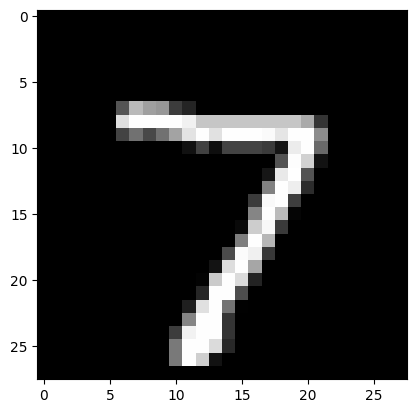

In [21]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[0]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()
